In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func, text, distinct


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn

In [3]:
#Create an engine to connect to the hawaii.sqlite database
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [4]:
# Using SQLAlchemy automap_base() to reflect tables from hawaii.sqlite above into classes 
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['hawaii_station', 'hawaii_station_measurement']

In [5]:
#Creating a db session
session = Session(engine)

In [6]:
#Saving a reference to classes Station and Station_Measurement
station = Base.classes.hawaii_station
measurement = Base.classes.hawaii_station_measurement

In [7]:
#Retrieving the last 12 months of precipitation data; date and prcp values
prcp_12_month_data = session.query( measurement.measurement_date, measurement.precipitation).\
        filter(measurement.measurement_date.between('2016-06-30','2017-06-30')).\
       order_by(measurement.measurement_date.asc()).all()

#Verify that the results look good
print(prcp_12_month_data)        

###### Loading the above query result into a dataframe  ########

#Unpack tuples using list comprehensions 
measure_dt = [row[0] for row in prcp_12_month_data]
prcp = [row[1] for row in prcp_12_month_data]

#Now load into a dataframe
df = pd.DataFrame(prcp_12_month_data, columns=['measure_dt', 'prcp'])
df.set_index('measure_dt', inplace=True)
df.head()

[('2016-06-30', 0.0), ('2016-06-30', 0.0), ('2016-06-30', 0.0), ('2016-06-30', -999.0), ('2016-06-30', 0.0), ('2016-06-30', 0.01), ('2016-07-01', 0.0), ('2016-07-01', 0.0), ('2016-07-01', 0.0), ('2016-07-01', -999.0), ('2016-07-01', 0.0), ('2016-07-01', -999.0), ('2016-07-02', 0.0), ('2016-07-02', 0.0), ('2016-07-02', -999.0), ('2016-07-02', 0.0), ('2016-07-03', 0.0), ('2016-07-03', 0.0), ('2016-07-03', 0.17), ('2016-07-03', 0.03), ('2016-07-04', 0.04), ('2016-07-04', 0.14), ('2016-07-04', -999.0), ('2016-07-04', 0.03), ('2016-07-04', 0.27), ('2016-07-04', -999.0), ('2016-07-05', 0.02), ('2016-07-05', 0.05), ('2016-07-05', 0.0), ('2016-07-05', -999.0), ('2016-07-05', 0.12), ('2016-07-05', 0.22), ('2016-07-05', 0.45), ('2016-07-06', 0.02), ('2016-07-06', 0.49), ('2016-07-06', 0.2), ('2016-07-06', -999.0), ('2016-07-06', 0.1), ('2016-07-06', 0.8), ('2016-07-06', 1.46), ('2016-07-07', 0.01), ('2016-07-07', 0.05), ('2016-07-07', 0.19), ('2016-07-07', -999.0), ('2016-07-07', 0.02), ('2016-0

,prcp
measure_dt,
2016-06-30,0.0
2016-06-30,0.0
2016-06-30,0.0
2016-06-30,-999.0
2016-06-30,0.0


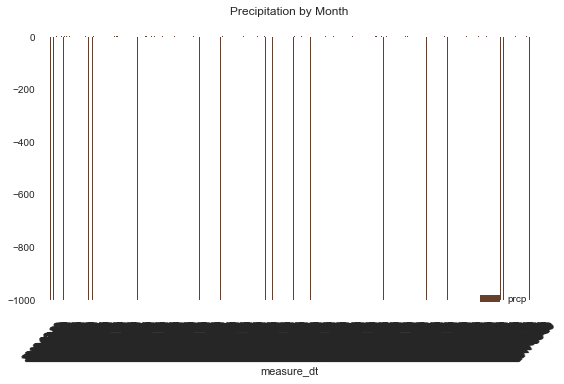

In [8]:
#Plot a histogram to show precipitation by month vs Date, for all the stations
df.plot.bar(title="Precipitation by Month", color="#663f2d")
#df.plot(x_compat=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
#Using Pandas to print the summary statistics for the precipitation data.
df.describe()

,prcp
count,2280.000000
mean,-96.644544
std,295.693378
min,-999.000000
25%,0.000000
50%,0.010000
75%,0.130000
max,9.640000


In [10]:
##############   Station Analysis #############

In [11]:
#Calculate the total number of stations
station_count = session.query(station).count()
station_count

9

In [12]:
#find the most active stations.

#List the stations and observation counts in descending order
station_obs_temp_cnt = session.query( measurement.station_abbr, func.count(measurement.station_abbr)).\
                        group_by(measurement.station_abbr).order_by(func.count(measurement.station_abbr).desc()).all()
station_obs_temp_cnt

#Computing station which has the highest number of observations?
station_obs_temp_cnt_highest  = session.query( measurement.station_abbr, func.count(measurement.station_abbr)).\
                        group_by(measurement.station_abbr).order_by(func.count(measurement.station_abbr).desc()).first()

print(station_obs_temp_cnt_highest[0]) 



USC00519281


In [13]:
#Verifying the number of records in the meaurement_station base class
station_obs_temp_cnt = session.query(measurement.station_abbr).count()
station_obs_temp_cnt

19550

In [14]:
#Query to retrieve the last 12 months of temperature observation data (tobs).
obs_temp_12_month_data = session.query(measurement.station_abbr, measurement.measurement_date, measurement.observed_temperature_F).\
        filter(measurement.measurement_date.between('2016-06-30','2017-06-30')).\
       order_by(measurement.measurement_date.asc()).all()


# Filter by the station with the highest number of observations.
obs_temp_12_month_data_highest  = session.query(measurement.observed_temperature_F).\
        filter(measurement.measurement_date.between('2016-06-30','2017-06-30')).\
        filter( measurement.station_abbr == station_obs_temp_cnt_highest[0]).\
        order_by(measurement.measurement_date.asc()).all()
        
print(obs_temp_12_month_data_highest)        

#Unpack tuples using list comprehensions, and create a list of temperatures 
obs_temp = [row[0] for row in obs_temp_12_month_data_highest]

obs_temp


[(77,), (76,), (79,), (76,), (79,), (75,), (74,), (73,), (78,), (80,), (72,), (79,), (80,), (76,), (80,), (80,), (73,), (77,), (78,), (79,), (80,), (79,), (78,), (75,), (76,), (78,), (78,), (80,), (81,), (80,), (77,), (75,), (76,), (76,), (77,), (77,), (81,), (78,), (78,), (81,), (81,), (82,), (80,), (76,), (80,), (76,), (75,), (74,), (82,), (80,), (79,), (81,), (79,), (78,), (77,), (77,), (80,), (80,), (75,), (73,), (78,), (77,), (78,), (80,), (80,), (78,), (78,), (78,), (73,), (74,), (80,), (79,), (77,), (80,), (76,), (79,), (75,), (79,), (78,), (79,), (78,), (78,), (76,), (74,), (77,), (78,), (79,), (79,), (77,), (80,), (78,), (78,), (78,), (77,), (79,), (79,), (79,), (79,), (75,), (76,), (73,), (72,), (71,), (77,), (79,), (78,), (79,), (77,), (79,), (77,), (78,), (78,), (78,), (78,), (77,), (74,), (75,), (76,), (73,), (76,), (74,), (77,), (76,), (76,), (74,), (75,), (75,), (75,), (75,), (71,), (63,), (70,), (68,), (67,), (77,), (74,), (77,), (76,), (76,), (75,), (76,), (75,), (73,)

[77,
 76,
 79,
 76,
 79,
 75,
 74,
 73,
 78,
 80,
 72,
 79,
 80,
 76,
 80,
 80,
 73,
 77,
 78,
 79,
 80,
 79,
 78,
 75,
 76,
 78,
 78,
 80,
 81,
 80,
 77,
 75,
 76,
 76,
 77,
 77,
 81,
 78,
 78,
 81,
 81,
 82,
 80,
 76,
 80,
 76,
 75,
 74,
 82,
 80,
 79,
 81,
 79,
 78,
 77,
 77,
 80,
 80,
 75,
 73,
 78,
 77,
 78,
 80,
 80,
 78,
 78,
 78,
 73,
 74,
 80,
 79,
 77,
 80,
 76,
 79,
 75,
 79,
 78,
 79,
 78,
 78,
 76,
 74,
 77,
 78,
 79,
 79,
 77,
 80,
 78,
 78,
 78,
 77,
 79,
 79,
 79,
 79,
 75,
 76,
 73,
 72,
 71,
 77,
 79,
 78,
 79,
 77,
 79,
 77,
 78,
 78,
 78,
 78,
 77,
 74,
 75,
 76,
 73,
 76,
 74,
 77,
 76,
 76,
 74,
 75,
 75,
 75,
 75,
 71,
 63,
 70,
 68,
 67,
 77,
 74,
 77,
 76,
 76,
 75,
 76,
 75,
 73,
 75,
 73,
 75,
 74,
 75,
 74,
 75,
 73,
 75,
 73,
 73,
 74,
 70,
 72,
 70,
 67,
 67,
 69,
 70,
 68,
 69,
 69,
 66,
 65,
 68,
 62,
 75,
 70,
 69,
 76,
 76,
 74,
 73,
 71,
 74,
 74,
 72,
 71,
 72,
 74,
 69,
 67,
 72,
 70,
 64,
 63,
 63,
 62,
 70,
 70,
 62,
 62,
 63,
 65,
 69,
 77,
 70,


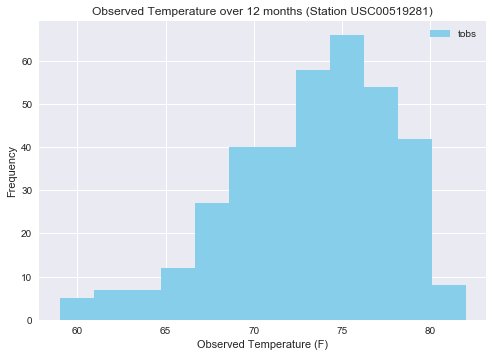

In [15]:
#Plot a histogram to show Observed Temperature in F, for the station with the highest number of temperature observations
plt.hist(obs_temp, bins=12, color="#87ceeb", label="tobs" )
plt.title("Observed Temperature over 12 months (Station " + station_obs_temp_cnt_highest[0] + ")")
plt.xlabel("Observed Temperature (F)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [16]:
###### Temperature Analysis ############

In [17]:
# This function will accept a start date and end date in the format %Y-%m-%d and return the minimum,
#average, and maximum temperatures for that range of dates.

def calc_temps(start_dt, end_dt):
    
    #Min temperature
    min_temp = session.query(func.min(measurement.observed_temperature_F)).\
                filter(measurement.measurement_date.between(start_dt, end_dt)).first()
   
    max_temp = session.query(func.max(measurement.observed_temperature_F)).\
                filter(measurement.measurement_date.between(start_dt, end_dt)).first()
        
    avg_temp = session.query(func.avg(measurement.observed_temperature_F)).\
                filter(measurement.measurement_date.between(start_dt, end_dt)).first()  
        
    #Returning the first column in each of the above results, since the result in each case is a tuple    
    return  (min_temp[0],  max_temp[0],  avg_temp[0])




In [18]:
# Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

#Set the start dt and end dt
test_start_dt = '2016-06-24'
test_end_dt = '2016-07-02'

(calc_min_temp, calc_max_temp, calc_avg_temp) = calc_temps(test_start_dt, test_end_dt)

#Test out the above function
print(calc_min_temp, calc_max_temp, calc_avg_temp)


      

71 82 77.01818181818182


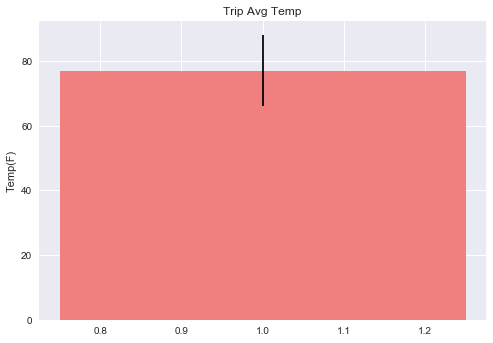

In [22]:
# Plot the min, avg, and max temperature from your previous query as a bar chart.
# Use the average temperature as the bar height.
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr). 
#plt.bar(yerr = calc_max_temp - calc_min_temp)
plt.bar(1, calc_avg_temp, color='lightcoral', width=0.5, yerr=calc_max_temp - calc_min_temp)
plt.title("Trip Avg Temp")
plt.ylabel("Temp(F)")
plt.show()